In [1]:
# Logistic Regression을 그림으로 알아보아요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import mglearn

warnings.filterwarnings(action='ignore')  # warning 출력 배제

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

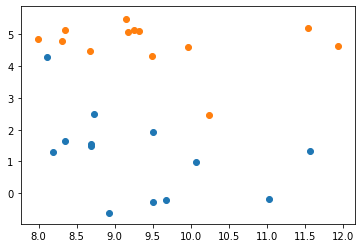

In [26]:
x,y=mglearn.datasets.make_forge()

# 먼저 간단하게 scatter(산점도) 그려보자
# y 값이 0인 x를 추출해서 x의 첫번째 컬럼은 x축으로
# x의 두 번째 컬럼을 y출으로 scatter를 그려보아요

blue=x[y==0]
orange=x[y==1]

plt.scatter(blue[:,0], blue[:,1])
plt.scatter(orange[:,0], orange[:,1])

In [31]:
# machine learning(Logistic Regression)
# train data set(test data set은 넘어가자: accuracy 측정이 목적이 아니므로)
train_x_data=x  # 2차배열
train_y_data=y.reshape([-1,1])  # 1차배열 => shape 맞춰야 함

# placeholder
X=tf.placeholder(shape=[None, 2],dtype=tf.float32)
Y=tf.placeholder(shape=[None, 1],dtype=tf.float32)

# weight & bias
W=tf.Variable(tf.random_normal([2,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
logit=tf.matmul(X,W)+b
H=tf.sigmoid(logit)

# cost(loss) function
cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                            labels=Y))

# train
train=tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)

# session & initializer
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(3000):
    _, cost_val=sess.run([train, cost],
                         feed_dict={X: train_x_data,
                                    Y: train_y_data})
    if step%300==0:
        print(f'cost value: {cost_val}')

cost value: 4.182097911834717
cost value: 0.30416446924209595
cost value: 0.2601892650127411
cost value: 0.24992766976356506
cost value: 0.2461535781621933
cost value: 0.2443642020225525
cost value: 0.24331539869308472
cost value: 0.24257484078407288
cost value: 0.24197176098823547
cost value: 0.24143339693546295


[1]


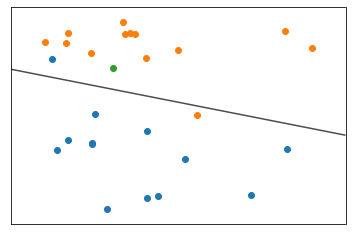

In [52]:
# 정확도 측정(Accuracy): 95% 이상 나오면 쓸만한 모델
#                      98%이상 나오면 실제 업무에 사용 가능한 모델
# Prediction(예측)
result=sess.run(H, feed_dict={X: [[9,4]]})
result

plt.scatter(blue[:,0], blue[:,1])
plt.scatter(orange[:,0], orange[:,1])
plt.scatter(9,4)

##################
## 모델 만듦
model=LogisticRegression()
myModel=model.fit(x,y)  # logistic model learning

print(myModel.predict([[9,4]]))
# linear => 선 만듦
# logistic => 선 찾기(두 분류 나누는) // hyperplane
#             선의 위: 1, 아래: 0
#             x가 3개면 공간이 됨 ==> 구하는 것은 선이 아닌 면


mglearn.plots.plot_2d_separator(myModel,x,fill=False, # 선 기준 위 아래 색 채움
                                eps=.5,  # 분포 좀 퍼지도록
                                alpha=.7)  # 선의 투명도

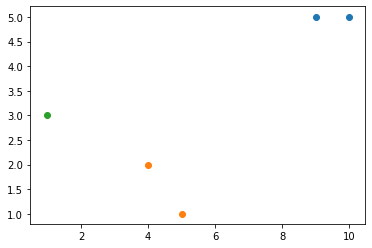

In [60]:
# Logistic을 multinomial로 확장해보아요
# x쪽 데이터는 시험성적과 출석점수
# y쪽 데이터는 학점
x=np.array([[10,5],
            [9,5],
            [5,1],
            [4,2],
            [1,3]])

y=np.array([['A'],
            ['A'],
            ['B'],
            ['B'],
            ['C']])

plt.scatter(x[0:2,0], x[0:2,1]) # A등급
plt.scatter(x[2:4,0], x[2:4,1]) # B등급
plt.scatter(x[4,0], x[4,1]) # C등급

In [82]:
import tensorflow as tf

# train data set
# 퀴즈1, 2, 3, 출석
train_x_data=[[10,9,8,5],
               [8,8,9,4],
               [7,8,2,3],
               [6,3,9,3],
               [7,5,7,4],
               [3,5,6,2],
               [2,4,3,1]]

train_y_data=[[1,0,0],
              [1,0,0],
              [0,1,0],
              [0,1,0],
              [0,1,0],
              [0,0,1],
              [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# wieght & bias
W = tf.Variable(tf.random_normal([4,3]), name='weight')
b = tf.Variable(tf.random_normal([1,3]), name='bias')

# Hypothesis
logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit) # sigmoid -> softmax 

# cost function
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                               labels=Y))

# train
train=tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)

# session, initializer
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# learning
for step in range(30000):
    _, cost_val=sess.run([train, cost], feed_dict={X: train_x_data,
                                                   Y: train_y_data})
    if step%3000==0:
        print(f'cost value: {cost_val}')

cost value: 17.565078735351562
cost value: 0.19044749438762665
cost value: 0.1269761174917221
cost value: 0.09560131281614304
cost value: 0.07649252563714981
cost value: 0.06361881643533707
cost value: 0.054371170699596405
cost value: 0.04741879180073738
cost value: 0.04200908541679382
cost value: 0.03768492490053177


In [97]:
# Accuracy(정확도)
# 기존 사용 방법
# predict=tf.cast(H>.5, dtype=tf.float32)
# predict

sess.run(H, feed_dict={X:[[10,8,9,5]]})
# array([[6.7991751e-01, 3.2008091e-01, 1.6600322e-06]], dtype=float32)

# argmax: 한 행 중 가장 큰 값의 index 번호 리턴시킴
predict=tf.argmax(H, axis=1)
correct=tf.equal(predict, tf.argmax(Y, axis=1))
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'Accuracy: {sess.run(accuracy, feed_dict={X:train_x_data,Y: train_y_data})}')

Accuracy: 1.0


#### 예제) BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서 자신의 상태를 확인해보아요


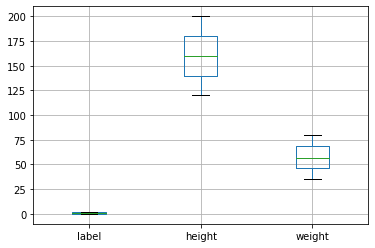

In [14]:
bmi=pd.read_csv('C:\\python_DA\\data\\bmi\\bmi.csv')  # skiprow=3

# 결측치 확인
bmi.isnull().sum()

# 이상치 확인
bmi.boxplot()

In [32]:
split_num=int(bmi.shape[0]*.8)
scaler=MinMaxScaler()

x_data=scaler.fit_transform(bmi[['height','weight']])
              # fit(min, max 필요 데이터 get)
              # transform(fit이 얻어돈 데이터로 변환작업)
scaler.data_max_  # 해당 columns들의 최대값
scaler.data_min_  # 해당 columns들의 최소값
# scaler가 train_data_set에 대한 최대, 최소값을 가지고 있게 됨

# train용, test용 x data 생성
train_x_data=x_data[:split_num]
test_x_data=x_data[split_num:]

# train용, test용 y data 생성 => one hot encoding
# one hot encoding으로 전환시킬 때  pandas.get_dummies()
#                                 tensorflow.one_hot()
sess=tf.Session()

# df -> ndarray(series?): [inclusive:inclusive]
train_y_data=sess.run(tf.one_hot(bmi.loc[:split_num-1,'label'],3))  # 3: depth
test_y_data=sess.run(tf.one_hot(bmi.loc[split_num:,'label'],3))

(4000, 3)

In [34]:
# train data set
# train_x_data=df[['height','weight']].values
# train_x_data=MinMaxScaler().fit_transform(train_x_data)

# train_y_data=df[['thin','normal','fat']]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# wieght & bias
W = tf.Variable(tf.random_normal([2,3]), name='weight')
b = tf.Variable(tf.random_normal([3]), name='bias')

# Hypothesis
logit=tf.matmul(X,W)+b
H=tf.nn.softmax(logit) # sigmoid -> softmax 

# cost function
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                               labels=Y))

# train
train=tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)

# session, initializer
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# learning
for step in range(30000):
    _, cost_val=sess.run([train, cost], feed_dict={X: train_x_data,
                                                   Y: train_y_data})
    if step%3000==0:
        print(f'cost value: {cost_val}')

cost value: 1.4160765409469604
cost value: 0.7793905735015869
cost value: 0.6213773488998413
cost value: 0.543876051902771
cost value: 0.49480190873146057
cost value: 0.4595852494239807
cost value: 0.4324456751346588
cost value: 0.41056087613105774
cost value: 0.39235028624534607
cost value: 0.37684494256973267


In [35]:
predict=tf.argmax(H, axis=1)
correct=tf.equal(predict, tf.argmax(Y, axis=1))
accuracy=tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'Accuracy: {sess.run(accuracy, feed_dict={X:train_x_data,Y: train_y_data})}')


Accuracy: 0.9501875042915344


In [45]:
prediction_data=scaler.transform([[160,30]])
result=sess.run(tf.argmax(H, 1),feed_dict={X:prediction_data})[0]

if result==0:
    print('THIN')
elif result==1:
    print('NORMAL')
else:
    print('FAT')

THIN
